In [ ]:
install.packages("knitr") 

#installs knitr, a package used to render tables here.
#it's here because we didn't use it in class. No need to run this if you have it already.

In [107]:
suppressMessages(library(tidymodels))
suppressMessages(library(tidyverse))
suppressMessages(library(GGally))
suppressMessages(library(knitr))


set.seed(4747) #hex decimal of g is 47, we are group 47. Thus: 4747 = g47

In [108]:
ifelse(file.exists("data"), stop("File already exists. If CSV file isn't downloaded, delete data folder"), dir.create("data"))
#checks if directory exists, to prevent possible errors with r kernel crashing from running this twice.


url <- "https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS"
download.file(url, "data/top500players.csv") # creates directory "data" and downloads the data used into the folder

### RUN THIS BLOCK ONLY ONCE 

ERROR: Error in ifelse(file.exists("data"), stop("File already exists. If CSV file isn't downloaded, delete data folder"), : File already exists. If CSV file isn't downloaded, delete data folder


In [109]:
player_data <- read_csv("data/top500players.csv", show_col_types = FALSE)
glimpse(player_data)

New names:
* `` -> ...1



Rows: 500
Columns: 38
$ ...1               <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1~
$ Age                <chr> "26 (25-04-1993)", "18 (22-12-2001)", "32 (03-11-19~
$ Country            <chr> "Brazil", "United Kingdom", "Slovakia", "Korea, Rep~
$ Plays              <chr> "Right-handed", "Left-handed", "Right-handed", "Rig~
$ Wikipedia          <chr> "Wikipedia", "Wikipedia", "Wikipedia", "Wikipedia",~
$ `Current Rank`     <chr> "378 (97)", "326 (119)", "178 (280)", "236 (199)", ~
$ `Best Rank`        <chr> "363 (04-11-2019)", "316 (14-10-2019)", "44 (14-01-~
$ Name               <chr> "Oscar Jose Gutierrez", "Jack Draper", "Lukas Lacko~
$ Backhand           <chr> NA, "Two-handed", "Two-handed", "Two-handed", "Two-~
$ `Prize Money`      <chr> NA, "$59,040", "US$3,261,567", "$374,093", "US$6,09~
$ Height             <chr> NA, NA, "185 cm", NA, "193 cm", NA, NA, NA, NA, NA,~
$ `Favorite Surface` <chr> NA, NA, "Fast (H, G) 40%", NA, "Fast (H, G) 36%", "~
$ `Turned Pro`    

In [110]:
colnames(player_data) <- make.names(colnames(player_data))
player_data_tidy <- player_data |>
                        separate(Best.Elo.Rank, c("Best.Rank", NA), sep = " ") |> #Removes the date next to the all-time best ranks
                        separate(Current.Elo.Rank, c("Current.Rank", NA), sep = " ") |> #Removes the elo next to the ranks
                        separate(Age, c("Age", NA), sep = " ") |>
                            select(Name, Age, Prize.Money, Seasons, Current.Rank, Best.Rank) |>
                         mutate(Prize.Money = gsub("[a-zA-Z$, -]", "", Prize.Money)) |> #removes all string chars next to numbers, US$ etc.
                         mutate(Prize.Money = as.numeric(Prize.Money)) |>
                         mutate(Best.Rank = as.numeric(Best.Rank)) |>
                         mutate(Current.Rank = as.numeric(Current.Rank)) |>
                         mutate(Age = as.numeric(Age)) |>
                        na.omit()

kable(head(player_data_tidy),
      caption = "Table 1.0")



Table: Table 1.0

|Name                  | Age| Prize.Money| Seasons| Current.Rank| Best.Rank|
|:---------------------|---:|-----------:|-------:|------------:|---------:|
|Lukas Lacko           |  32|     3261567|      14|          144|        60|
|Bernard Tomic         |  27|     6091971|      11|          100|        21|
|Hubert Hurkacz        |  22|     1517157|       5|           33|        33|
|Sanjar Fayziev        |  25|      122734|       5|          189|       187|
|Felix Auger Aliassime |  19|     1893476|       3|           51|        30|
|Daniil Medvedev       |  23|    10507693|       5|            5|         4|

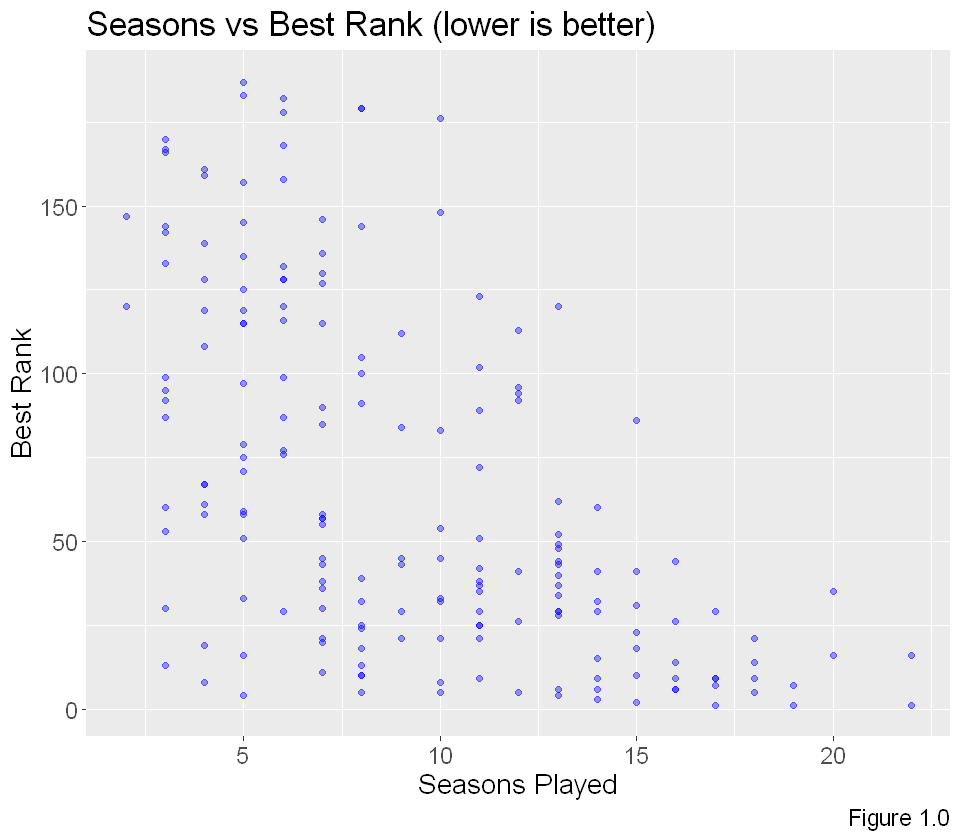

In [113]:
options(repr.plot.length = 10, repr.plot.width = 8)

SeasonsVsBestRank <- ggplot(player_data_tidy, aes(x = Seasons, y = Best.Rank)) + 
                    # geom_smooth(method = "lm", colour = "red", formula = y ~ x, se = FALSE) + #Line of best fit, helps in seeing relationship
                    geom_point(colour = "blue", alpha = 0.4) +
                     labs(x = "Seasons Played", y = "Best Rank", 
                          title = "Seasons vs Best Rank (lower is better)",
                          caption = "Figure 1.0") + 
                     theme(text = element_text(size = 17))

SeasonsVsBestRank

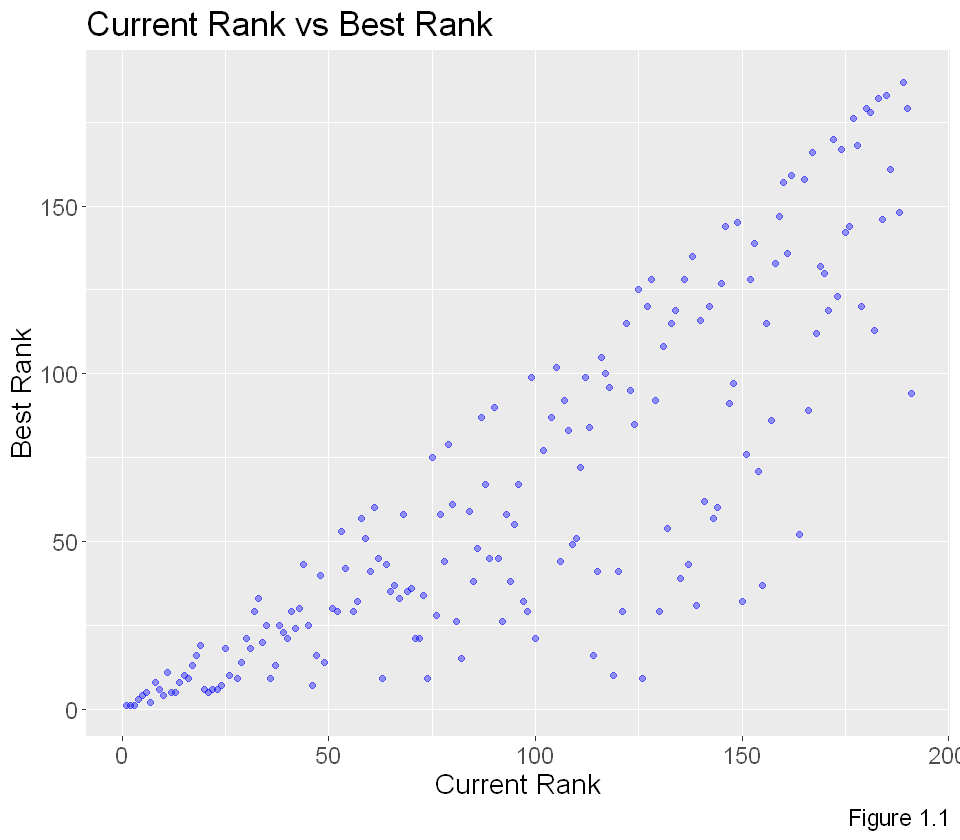

In [114]:
CurrentRankVsBestRank <- ggplot(player_data_tidy, aes(x = Current.Rank, y = Best.Rank)) + 
                    geom_point(color = "blue", alpha = 0.4) +
                     labs(x = "Current Rank", y = "Best Rank",
                          title = "Current Rank vs Best Rank",
                          caption = "Figure 1.1") + 
                     theme(text = element_text(size = 17)) 

CurrentRankVsBestRank

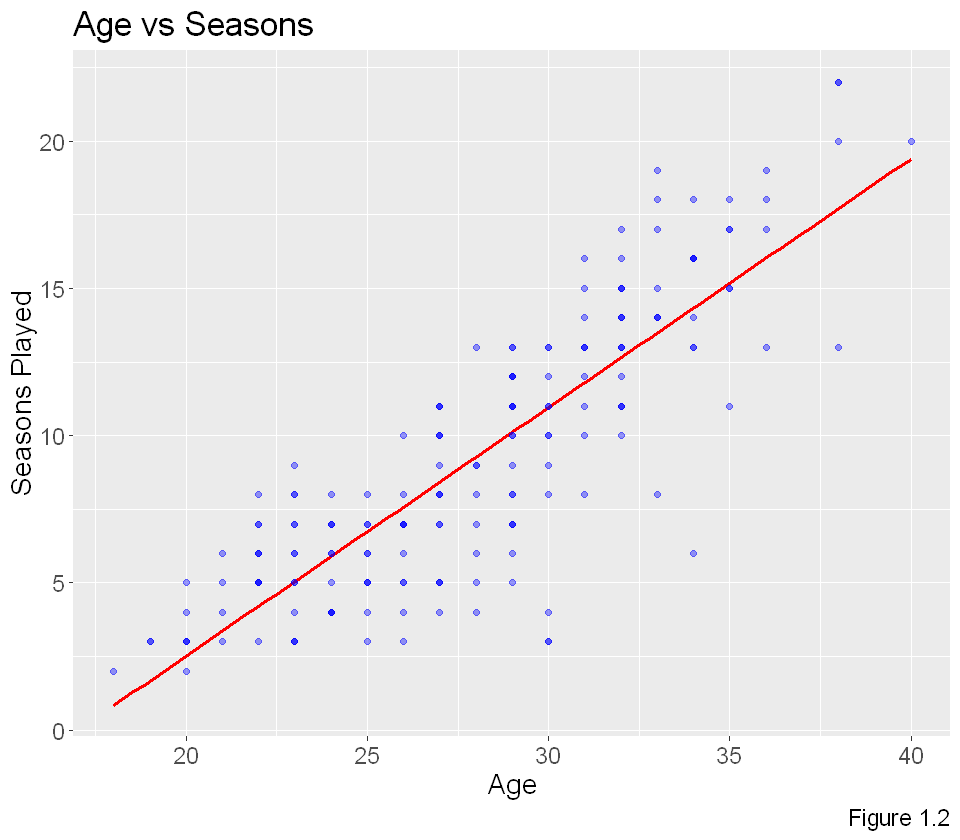

In [115]:
AgeVsSeasons <- ggplot(player_data_tidy, aes(x = Age, y = Seasons)) + 
                    geom_smooth(method = "lm", colour = "red", formula = y ~ x, se = FALSE) + #Line of best fit, helps in seeing relationship
                    geom_point(color = "blue", alpha = 0.4) +
                     labs(x = "Age", y = "Seasons Played",
                          title = "Age vs Seasons",
                          caption = "Figure 1.2") + 
                     theme(text = element_text(size = 17)) 

AgeVsSeasons

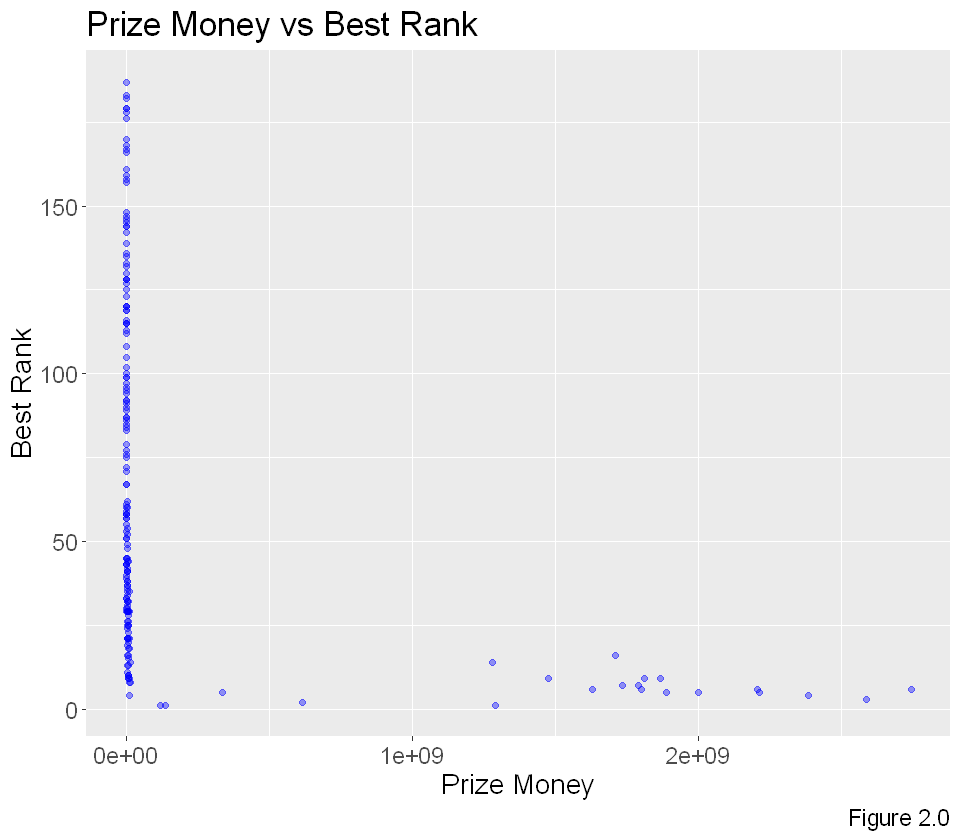

In [116]:
PrizeMoneyVsBestRank <- ggplot(player_data_tidy, aes(x = Prize.Money, y = Best.Rank)) + 
                    geom_point(color = "blue", alpha = 0.4) +
                     labs(x = "Prize Money", y = "Best Rank",
                          title = "Prize Money vs Best Rank",
                          caption = "Figure 2.0") +  
                     theme(text = element_text(size = 17))

PrizeMoneyVsBestRank

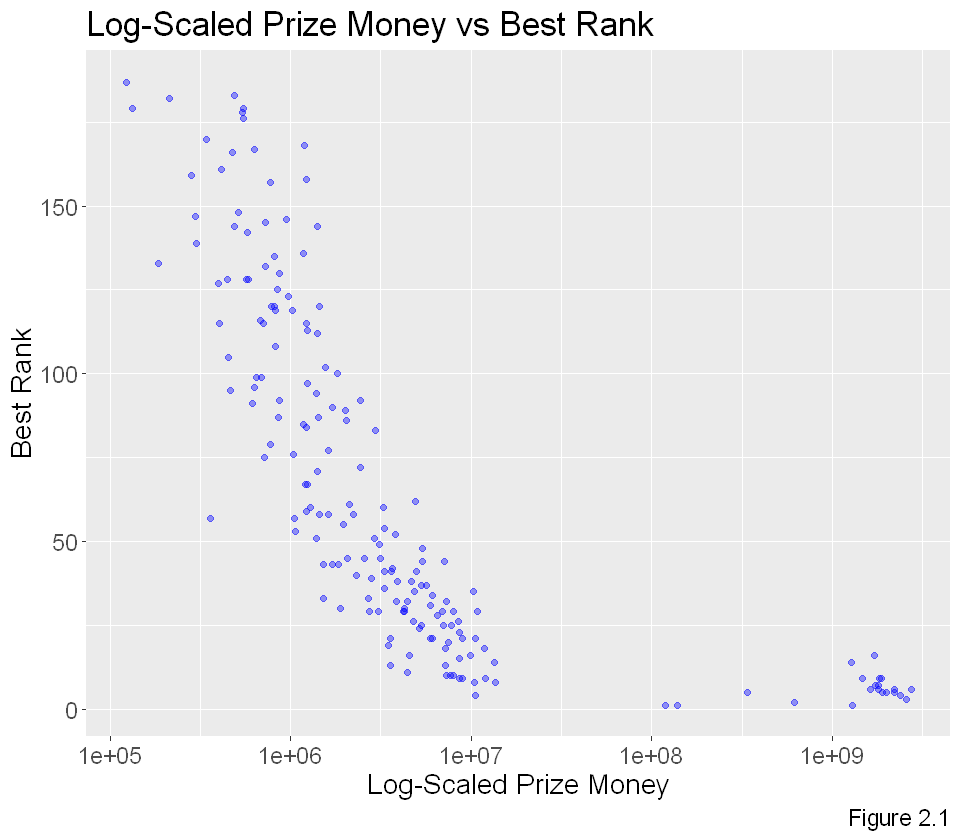

In [117]:
LogPrizeMoneyVsBestRank <- ggplot(player_data_tidy, aes(x = Prize.Money, y = Best.Rank)) + 
                    geom_point(color = "blue", alpha = 0.4) +
                     labs(x = "Log-Scaled Prize Money", y = "Best Rank",
                          title = "Log-Scaled Prize Money vs Best Rank",
                          caption = "Figure 2.1") +  
                     theme(text = element_text(size = 17)) +
                     scale_x_log10()

LogPrizeMoneyVsBestRank

In [118]:
log_player_data_tidy <- player_data_tidy |>
                            mutate(Prize.Money = log(Prize.Money))

In [119]:
set.seed(4747)


player_split <- initial_split(log_player_data_tidy)
player_training <- training(player_split)
player_testing <- testing(player_split)

In [120]:
set.seed(4747)

player_vfold <- vfold_cv(player_training, v = 5, strata = Best.Rank)
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 1))

player_recipe <- recipe(Best.Rank ~ Seasons + Prize.Money + Current.Rank, data = player_training) |> 
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())

knn_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                set_engine("kknn") |>
                set_mode("regression")

player_resamples_metrics <- workflow() |>
                            add_model(knn_spec_tune) |>
                            add_recipe(player_recipe) |>
                            tune_grid(resamples = player_vfold, grid = k_vals) |>
                            collect_metrics()

In [121]:
resamples_metrics_clean <- player_resamples_metrics |>
                                filter(.metric == "rmse") |>
                                arrange(mean) |>
                                slice(1) |>
                                select(-.estimator, -n, -.config)

kable(resamples_metrics_clean, caption = "Table 2.0")



Table: Table 2.0

| neighbors|.metric |     mean|  std_err|
|---------:|:-------|--------:|--------:|
|        10|rmse    | 16.45332| 1.157192|

In [122]:
set.seed(4747)

best_k <- resamples_metrics_clean |>
            select(neighbors) |>
            pull()

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
                set_engine("kknn") |>
                set_mode("regression")

knn_fit <- workflow() |>
            add_model(knn_spec) |>
            add_recipe(player_recipe) |>
            fit(player_training) 

knn_predict <- predict(knn_fit, player_testing) |>
                bind_cols(player_testing)

knn_metrics <- metrics(knn_predict, truth = Best.Rank, estimate = .pred)

knn_fit

== Workflow [trained] ==================================================================================================
Preprocessor: Recipe
Model: nearest_neighbor()

-- Preprocessor --------------------------------------------------------------------------------------------------------
2 Recipe Steps

* step_scale()
* step_center()

-- Model ---------------------------------------------------------------------------------------------------------------

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(10,     data, 5), kernel = ~"rectangular")

Type of response variable: continuous
minimal mean absolute error: 12.34599
Minimal mean squared error: 279.4064
Best kernel: rectangular
Best k: 10

In [125]:
kable(head(knn_predict), 
      caption = "Table 3.0")



Table: Table 3.0

| .pred|Name                    | Age| Prize.Money| Seasons| Current.Rank| Best.Rank|
|-----:|:-----------------------|---:|-----------:|-------:|------------:|---------:|
|  31.1|Hubert Hurkacz          |  22|    14.23235|       5|           33|        33|
|   7.0|Juan Martin Del Potro   |  31|    21.67452|      14|            4|         3|
|  39.2|Marcel Granollers       |  33|    16.19701|      14|          121|        29|
|  25.2|Fabio Fognini           |  32|    16.41602|      16|           29|        14|
|  33.0|Robin Haase             |  32|    15.77764|      13|           78|        44|
|  66.6|Roberto Carballes Baena |  26|    14.34727|       7|           90|        90|

In [126]:
kable(head(knn_metrics), 
      caption = "Table 3.1")



Table: Table 3.1

|.metric |.estimator |  .estimate|
|:-------|:----------|----------:|
|rmse    |standard   | 18.1065986|
|rsq     |standard   |  0.8399648|
|mae     |standard   | 12.6065217|

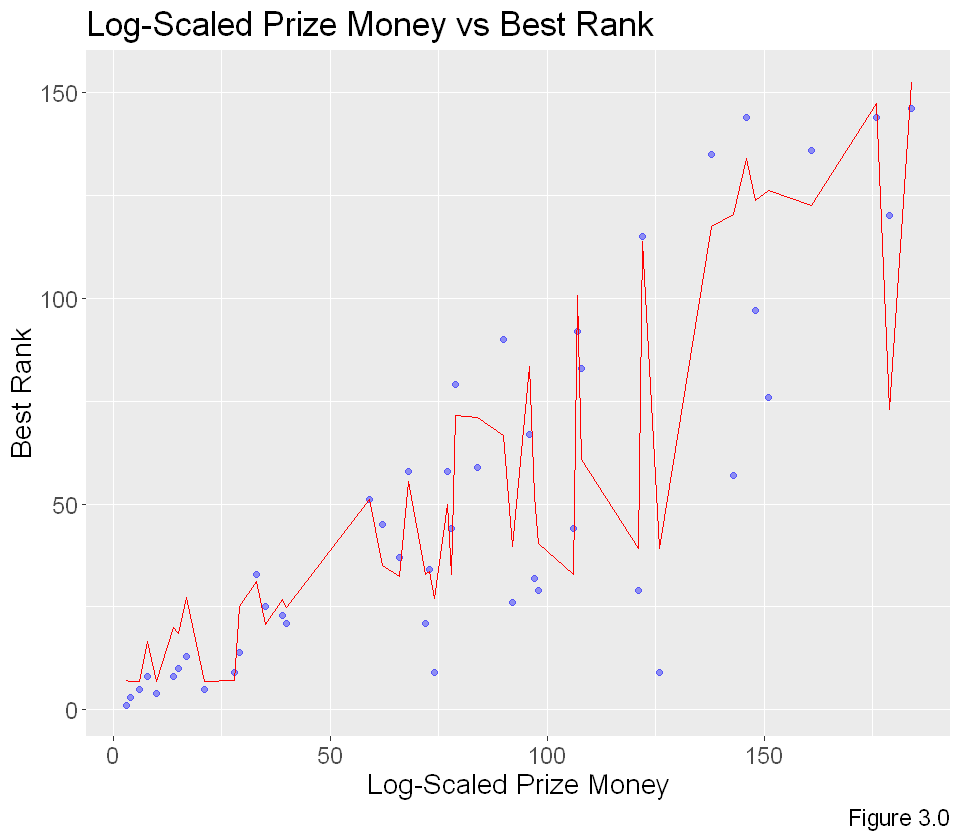

In [128]:
PredPlot <- ggplot(knn_predict, aes(x = Current.Rank, y = Best.Rank)) + 
                    geom_point(color = "blue", alpha = 0.4) +
                    geom_line(aes(x = Current.Rank, y = .pred), color = "red") +
                     labs(x = "Log-Scaled Prize Money", y = "Best Rank",
                          title = "Log-Scaled Prize Money vs Best Rank",
                          caption = "Figure 3.0") +  
                     theme(text = element_text(size = 17))

PredPlot